## 0.1 - Importações iniciais de bibliotecas

In [274]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OrdinalEncoder 

import requests

## 0.2 - Acesso a API e tratamento do json

In [275]:
a = False

if a:
    url = r'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

    requisicao = requests.get(url)
    requisicao = requisicao.json()

    dados = pd.json_normalize(requisicao)

    dados.to_csv('JsonConvertido.csv', index=False)

In [276]:
from path import caminho
dados = pd.read_csv(caminho)

In [277]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1 - EDA

In [278]:
dados.describe(include=object)

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7043,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [279]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [280]:
colunas = dados.columns
colunas

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [281]:
dados.shape

(7267, 21)

In [282]:
dados.isnull().sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
dtype: int64

Variáveis que precisam ser entendidas e quais são seus valores

In [283]:
colunas_categoricas = [x for x in dados.columns if dados[x].dtypes == 'object' and x!="customerID"]
colunas_numericas = [x for x in dados.columns if dados[x].dtypes == 'int64' or dados[x].dtypes=="float64" ]


In [284]:
# Encontrando os valores unicos de cada coluna
for valor in colunas_categoricas:
    print(f'{valor}: {dados[valor].unique()}')

Churn: ['No' 'Yes' nan]
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


### Tratamento inicial das incosistências

In [285]:
lista = ["customer.tenure", "account.Contract"]
dados[lista].sample(10)

,customer.tenure,account.Contract
1884,37,Month-to-month
2317,34,One year
6656,24,Month-to-month
4846,4,Month-to-month
3116,2,Month-to-month
7121,66,Two year
2719,1,Month-to-month
1919,8,Month-to-month
5174,30,One year
4302,72,Two year


In [286]:
#retirando as linhas que possuem valores nulos na variável target e resetando os índices
dados = dados.dropna()
dados.reset_index(drop=True, inplace=True)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [287]:
dados.loc[dados['account.Charges.Total'] == " "]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [288]:
dados['account.Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [289]:
dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'],
                                               errors='coerce')

dados['account.Charges.Total'].dtype

dtype('float64')

In [290]:
colunas_numericas = [x for x in dados.columns if dados[x].dtypes == 'int64' or dados[x].dtypes=="float64" ]

In [291]:
one_year_median = dados.loc[dados["account.Contract"]== "One year"]
one_year_median = one_year_median["customer.tenure"].median()

two_year_median = dados.loc[dados["account.Contract"]== "Two year"]
two_year_median = two_year_median["customer.tenure"].median()

In [292]:
print(one_year_median, two_year_median)

44.0 64.0


In [293]:
indice_dados_faltantes = dados[dados['account.Charges.Total'].isnull()].index

def altera_charges_total(row):

    if row["account.Contract"] == 'One year':
        row["account.Charges.Total"] = row["account.Charges.Monthly"] * one_year_median
        row["customer.tenure"] = one_year_median

    else:  
        row["account.Charges.Total"] = row["account.Charges.Monthly"] * two_year_median
        row["customer.tenure"] = two_year_median
    return row

dados.loc[indice_dados_faltantes] = dados.loc[indice_dados_faltantes].apply(altera_charges_total, axis=1)
    

In [294]:
dados.loc[indice_dados_faltantes]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,64,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,3587.2
1731,2520-SGTTA,No,Female,0,Yes,Yes,64,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1280.0
1906,2775-SEFEE,No,Male,0,No,Yes,64,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,3961.6
2025,2923-ARZLG,No,Male,0,Yes,Yes,44,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,866.8
2176,3115-CZMZD,No,Male,0,No,Yes,64,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1296.0
2250,3213-VVOLG,No,Male,0,Yes,Yes,64,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1622.4
2855,4075-WKNIU,No,Female,0,Yes,Yes,64,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,4694.4
3052,4367-NUYAO,No,Male,0,Yes,Yes,64,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1648.0
3118,4472-LVYGI,No,Female,0,Yes,Yes,64,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,3363.2
4054,5709-LVOEQ,No,Female,0,Yes,Yes,64,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,5174.4


In [295]:
dados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## Criação de gráficos

### Churn e variávels categóricas

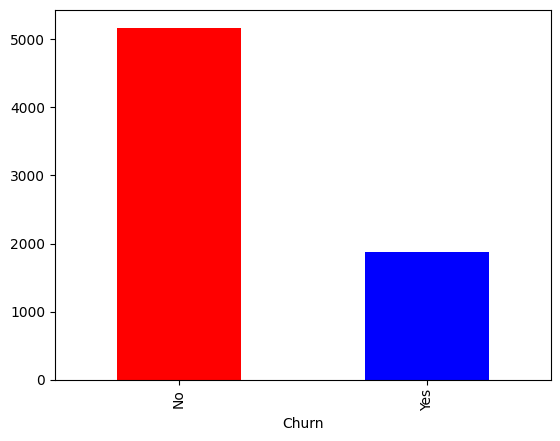

In [296]:
valor_churn_churn = dados.groupby("Churn")["Churn"].value_counts()
valor_churn_churn.plot(kind="bar", color= ["red", "blue"])
plt.show()

-> Comparação entre churn e genero e churn e Se é sênior

In [297]:
mean_churn_gender = dados.groupby("customer.gender")["Churn"].value_counts()
mean_churn_Senior = dados.groupby("customer.SeniorCitizen")["Churn"].value_counts()

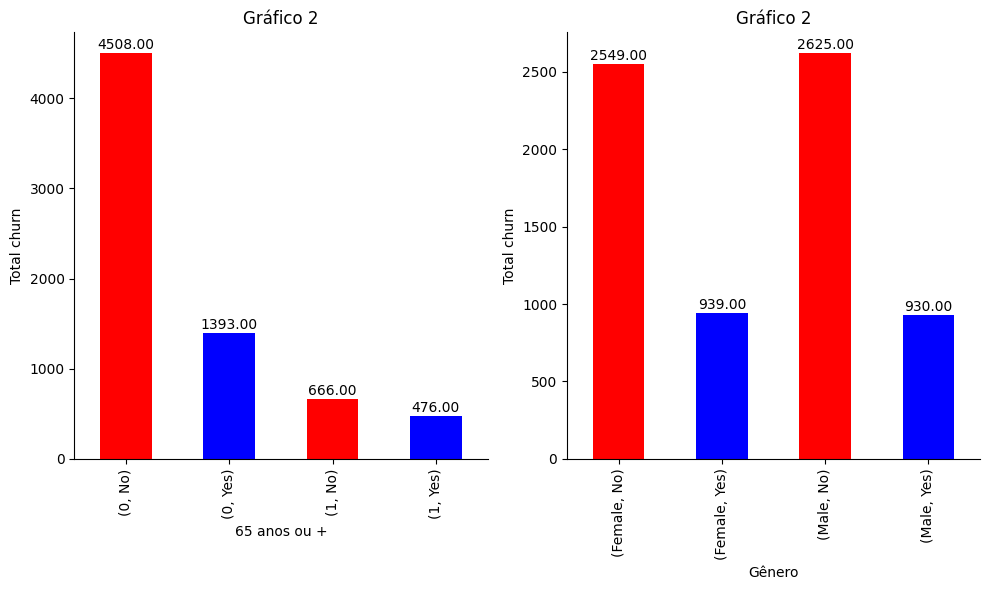

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Crie a figura com dois subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Primeiro gráfico de barras
mean_churn_Senior.plot(kind="bar", color=["red", "blue"], ax=ax[0])
ax[0].set_title('Gráfico 2')
ax[0].set_xlabel('65 anos ou +')
ax[0].set_ylabel('Total churn')

mean_churn_gender.plot(kind="bar", color=["red", "blue"], ax=ax[1])
ax[1].set_title('Gráfico 2')
ax[1].set_xlabel('Gênero')
ax[1].set_ylabel('Total churn')


for a in ax:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    for p in a.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        a.annotate(f'{y:.2f}\n', (x, y), ha='center', va='center')

# Exiba o gráfico
plt.tight_layout()
plt.show()


Nota-se algumas coisas ao olhar os gráficos de cima

1 - Os dados não estão balanceados  
2 - Não há importância estatística entre gêneros  
3 - Pessoas consideradas sênior tem uma tendência maior da dar churn

-> Comparacao do churn com os serviços de telefonia

In [299]:
"""

servicos_telefonia = dados.groupby("Churn")["phone.PhoneService"].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

servicos_telefonia.plot(kind="bar", color=["#ADD8E6", "#90EE90"])


ax.set_title("Relação churn com possuir serviços de internet",fontsize=14)
ax.set_xlabel("Churn x possuir")
ax.set_ylabel("Valor rotal do churn")

plt.show()"""


'\n\nservicos_telefonia = dados.groupby("Churn")["phone.PhoneService"].value_counts()\n\nfig, ax = plt.subplots(figsize=(8,6))\n\nservicos_telefonia.plot(kind="bar", color=["#ADD8E6", "#90EE90"])\n\n\nax.set_title("Relação churn com possuir serviços de internet",fontsize=14)\nax.set_xlabel("Churn x possuir")\nax.set_ylabel("Valor rotal do churn")\n\nplt.show()'

### Relação do churn com Variáveis numéricas

In [300]:
colunas_numericas_verdadeiras = colunas_numericas[1:]
colunas_numericas_verdadeiras

['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

#### Churn e o valor gasto em media pelos clientes

In [301]:
media_churn_Charges_Total = dados.groupby("Churn")["account.Charges.Total"].mean()

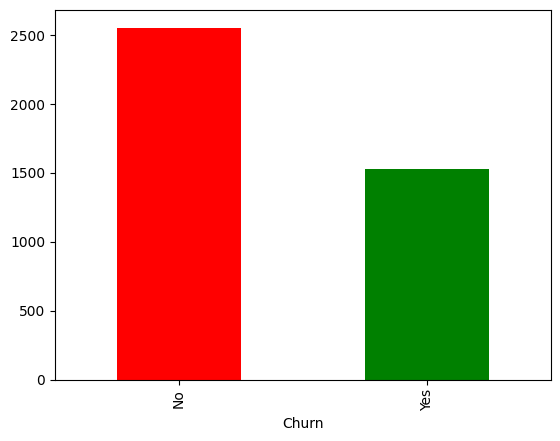

In [302]:

media_churn_Charges_Total.plot(kind="bar", color=["red", "green"])

plt.show()


> Pessoas que gastam mais com o serviço tendem a se manter com ele

### Histogramas

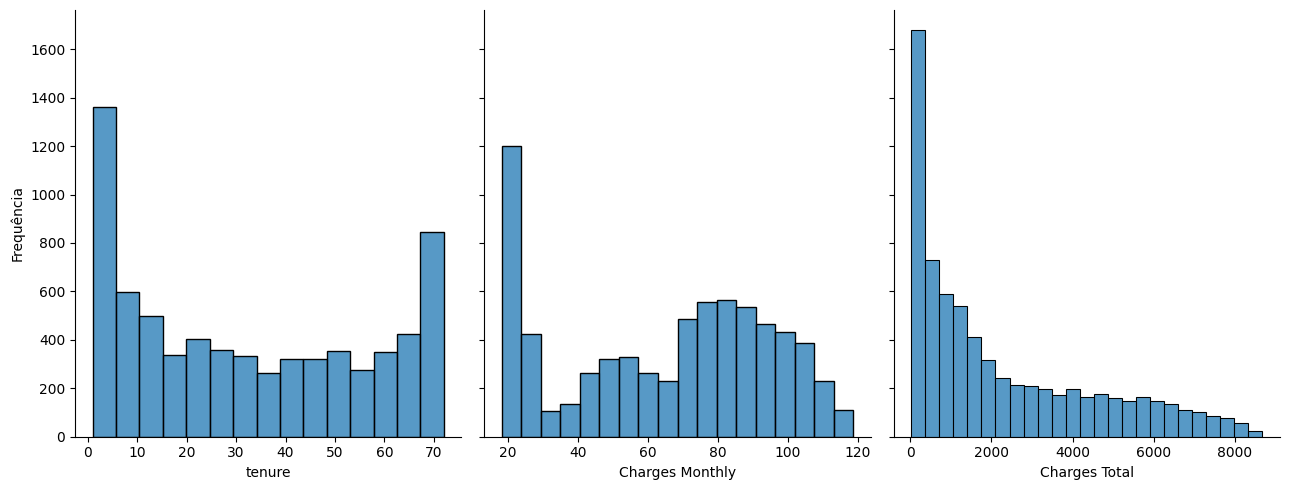

In [303]:
fig, axes = plt.subplots(1, len(colunas_numericas_verdadeiras), figsize=(13, 5), sharey = True)

for i, col in enumerate((colunas_numericas_verdadeiras)):
    sns.histplot(dados2[col], ax=axes[i])
    sns.despine(right=True, top=True)
    col_name = ' '.join(col.split('.')[1:])
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Frequência')
        
plt.tight_layout()
plt.show()

Temos no último grafo um histograma distorcido à direita, demostrando que a maioria das pessoas tendem a gastar no total entre 0 e 4000

### Boxplot

In [312]:
for coluna in colunas_numericas_verdadeiras:
    col_name = ' '.join(coluna.split('.')[1:])

col_name

'Charges Total'

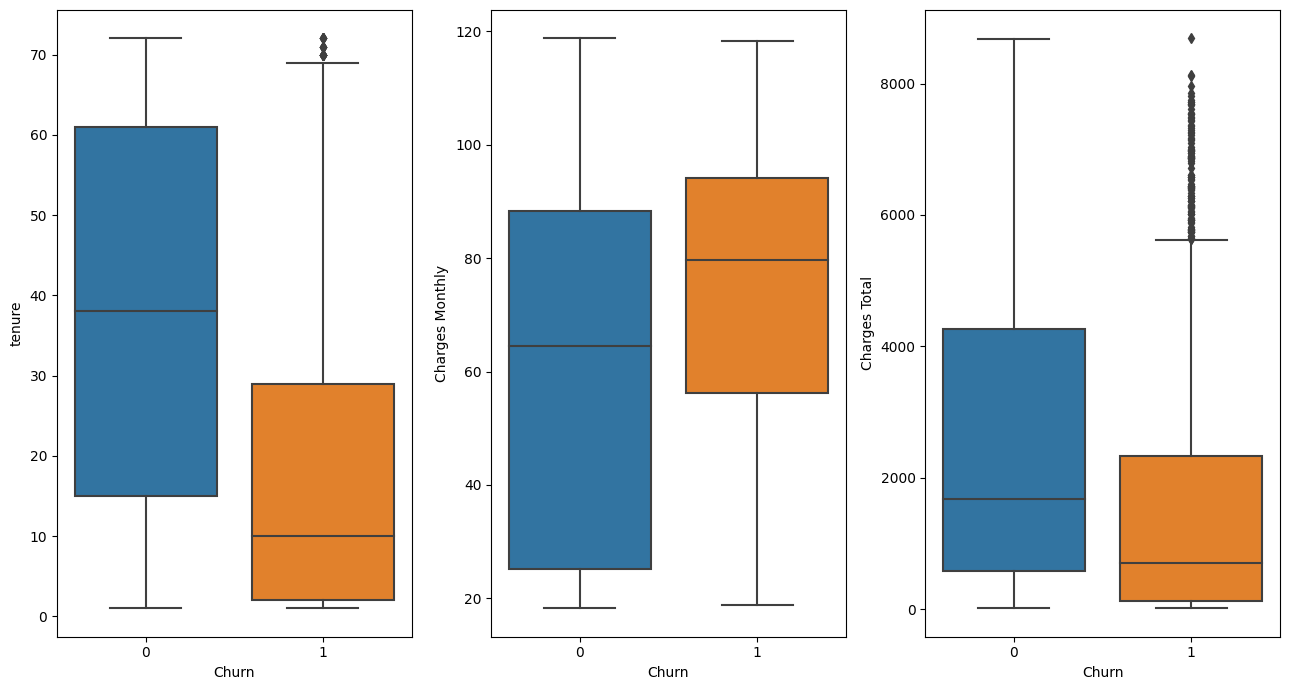

In [322]:
fig, axes = plt.subplots(1, len(lista), figsize=(13, 7))
lista = colunas_numericas_verdadeiras

for i, col in enumerate(lista):
    if "." in col:
        col_name = ' '.join(col.split('.')[1:])
    else:
        col_name = col
        
    boxplot = sns.boxplot(x='Churn', y=col, data=dados2, ax=axes[i]) 

    axes[i].set_ylabel(col_name)

        
    

plt.tight_layout()
plt.show()

> O primeiro gráfico demonstra que tem uma tendência de pessoas que tendem a manter o serviço ter um maior tempo de contrato  
> O segundo demonstra, algo não previsto em um primeiro momento, que os clientes que cancelaram o serviço  possuíam um gasto mensal maior  
> O último gráfico, mostra que os clientes com maiores gastos tendem a manter o contrato

### Correlação de variaveis

In [189]:
colunas_dummies = ['Churn', 
                   'customer.Partner', 
                   'customer.Dependents',
                   'phone.PhoneService', 
                   'account.PaperlessBilling']

colunas_multiclasses = ['internet.InternetService', 
                        'account.Contract',
                        'account.PaymentMethod']

colunas_dummies_mais_UM = ['phone.MultipleLines', 
                        'internet.OnlineSecurity', 
                        'internet.OnlineBackup',
                        'internet.DeviceProtection', 
                        'internet.TechSupport', 
                        'internet.StreamingTV',
                        'internet.StreamingMovies']

In [191]:
dados2 = dados.copy()

In [192]:
for feature in colunas_dummies:
    dados2[feature] = dados2[feature].apply(lambda x: 1 if x == 'Yes' else 0)

In [193]:
dados2[colunas_dummies].corr()

,Churn,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
Churn,1.000000,-0.150448,-0.164221,0.011942,0.191825
customer.Partner,-0.150448,1.000000,0.452676,0.017706,-0.014877
customer.Dependents,-0.164221,0.452676,1.000000,-0.001762,-0.111377
phone.PhoneService,0.011942,0.017706,-0.001762,1.000000,0.016505
account.PaperlessBilling,0.191825,-0.014877,-0.111377,0.016505,1.000000


<Axes: >

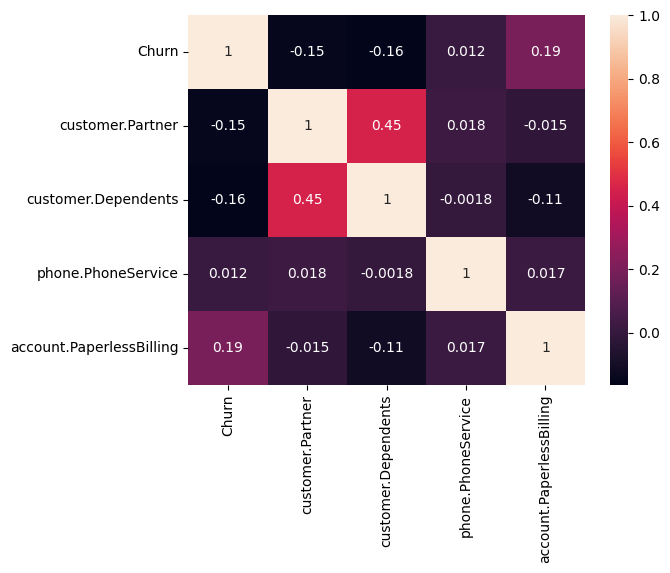

In [195]:
sns.heatmap(dados2[colunas_dummies].corr(), annot=True)